(23,)


100%|██████████| 1000000/1000000 [00:13<00:00, 76904.20it/s]


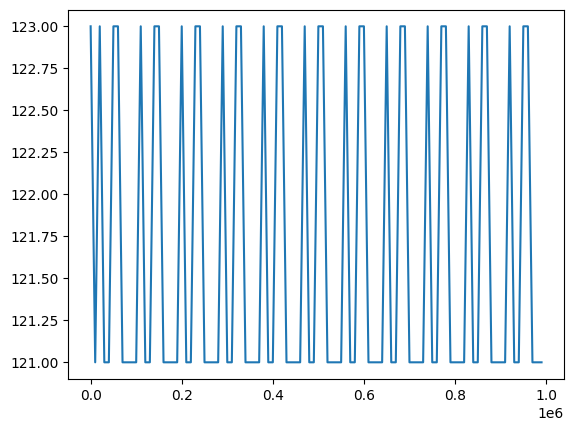

In [1]:
import numpy as np
from dimple3 import DIMPLE3
import matplotlib.pyplot as plt
from tqdm import tqdm

J = np.load("data/TCARPdata/preprocessed/qubo/qubo_2D-S1.npy")
h = np.zeros(J.shape[0])+10
print(h.shape)

model = DIMPLE3(J,h,num_spins=len(h))

evals = []

num_iter = int(1e6)
snapshot = int(1e4)

for i in tqdm(range(num_iter)):
    model.iterate()
    if i % snapshot == 0:
        evals.append(model.evaluate())
        
plt.plot([i for i in range(0,num_iter,snapshot)],evals)

Comparison to simulated Coherent Ising Machine.

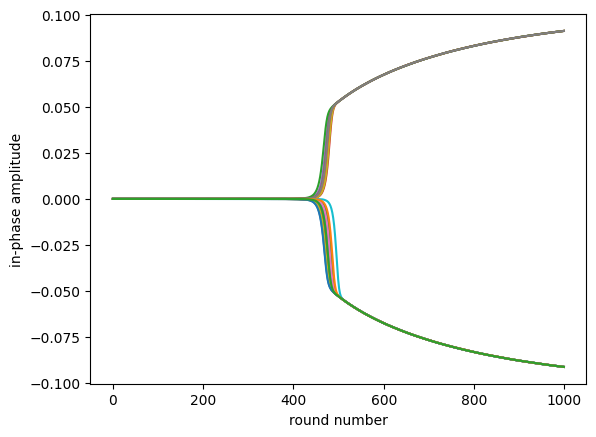

In [5]:
import pycim as cim

# All borrowed from: https://github.com/shadowforwind/pycim-simulator/blob/main/display.ipynb

# Initialize input
device = cim.simulation.device()
setup = cim.simulation.setup()
## Set physical layer parameters, it is not recommended to modify them after setting them
# Set the total system loss, normal : dB
device.loss = 10**(-11/10)
# Set the gain coefficient of nonlinear media, normal: W^(-1/2)
device.kappa = 130 * device.c 
# Set the length of nonlinear media, normal : m
device.L_ppln = 0.05 

## Set application layer parameters, which can be modified according to different scenarios
# Set the number of wheels to run in the cavity
setup.round_number = 1000
setup.N = len(h)
setup.couple_matrix = J
setup.intensity = np.zeros(setup.round_number,)
# Set pump scheduling
setup.pump_schedule = np.sqrt( 10e-5 * np.linspace(1,setup.round_number,setup.round_number) )
# Set the simulation model as the "discrete" model and the numerical solution algorithm as the "RK45" algorithm. Pass in the physical layer and application layer parameters for a single simulation, and return the in-phase component and gain of OPO as the return value
sol_info,gain = cim.simulation.singleSimulation( device , setup , model="discrete" , solver="RK45")
# Changes in the in-phase component of OPO in the cavity
cim.analyzer.inPhase_graph(sol_info,setup)

In [7]:
step = 10
cut_list = cim.simulation.multiSimulation( device , setup , step , model="discrete" , solver="RK45" )
SuccessRate = cim.sampler.getSuccessRate(cut_list,based_cut = 18)
ave_cut = cim.sampler.getAveCutValue(cut_list,step)
print(f"SuccessRate:{SuccessRate}\nave_cut:{ave_cut}\n")

SuccessRate:1.0
ave_cut:132.0

